# Demonstration of `open_spiel` Implementation of Mathematico

In [4]:
import sys
sys.path.append("../")

from src.agents.ospiel import * # this registers the game to pyspiel

import pyspiel
from open_spiel.python.algorithms import mcts
import numpy as np
from tqdm.notebook import tqdm, trange
from matplotlib import pyplot as plt

## Random Game

In [5]:
game = pyspiel.load_game("mathematico")
state = game.new_initial_state()

RANDOM_PLAYER = lambda state: np.random.choice(state.legal_actions())
while not state.is_terminal():
    action = RANDOM_PLAYER(state)
    state.apply_action(action)

print("Final state")
print(state)
print("Score =", state.returns()[0])

Final state
+--+--+--+--+--+
|10| 3| 5|13| 7|
+--+--+--+--+--+
| 6| 3| 9|13|12|
+--+--+--+--+--+
| 3| 1| 8| 2| 7|
+--+--+--+--+--+
|12| 6| 4| 4| 6|
+--+--+--+--+--+
| 6|13| 5|10| 8|
+--+--+--+--+--+
Card: None
Deck: {1: 3, 2: 3, 3: 1, 4: 2, 5: 2, 6: 0, 7: 2, 8: 2, 9: 3, 10: 2, 11: 4, 12: 2, 13: 1}
Score = 110


## MCTS Player

In [3]:
state = game.new_initial_state()
evaluator = mcts.RandomRolloutEvaluator()
bot = mcts.MCTSBot(game, uct_c=1.4, max_simulations=50, evaluator=evaluator)

while not state.is_terminal():
    if state.is_chance_node():
        action = RANDOM_PLAYER(state)
    else:
        action = bot.step(state)
    state.apply_action(action)

print(state)
print(state.returns()[0])

+--+--+--+--+--+
| 9|13| 9| 5|13|
+--+--+--+--+--+
| 6| 4| 4|11| 4|
+--+--+--+--+--+
| 7| 7|10| 3| 3|
+--+--+--+--+--+
| 6| 1|11|10| 2|
+--+--+--+--+--+
|12|12|12|12| 2|
+--+--+--+--+--+
Card: None
Deck: {1: 3, 2: 2, 3: 2, 4: 1, 5: 3, 6: 2, 7: 2, 8: 4, 9: 2, 10: 2, 11: 2, 12: 0, 13: 2}
440


## Exploration vs \#Simulations

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

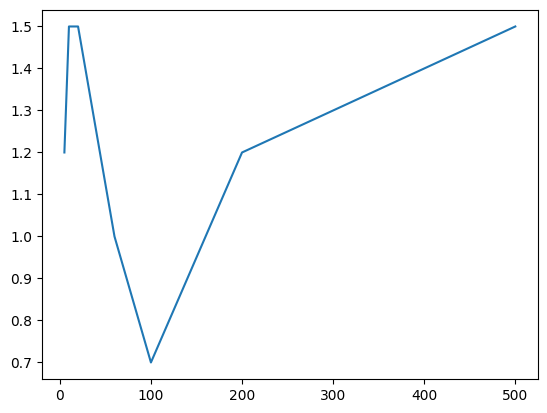

In [4]:
best_uct_c = {}  # num_simuls -> float
SIMULS = [5, 10, 20, 60, 100, 200, 500]
UCT_C = [0.2, 0.5, 0.7, 1., 1.2, 1.5]
GAMES = 10

for s in tqdm(SIMULS):
    uct_to_avg_score = {}
    for uct in tqdm(UCT_C, leave=None):
        scores = []
        bot = mcts.MCTSBot(game, uct_c=uct, max_simulations=s, evaluator=mcts.RandomRolloutEvaluator())
        for _ in trange(GAMES, leave=None):
            state = game.new_initial_state()
            while not state.is_terminal():
                if state.is_chance_node():
                    action = RANDOM_PLAYER(state)
                else:
                    action = bot.step(state)
                state.apply_action(action)
            scores.append(state.returns()[0])
        uct_to_avg_score[uct] = sum(scores) / len(scores)
    best_uct_c[s] = max(uct_to_avg_score, key=lambda uct: uct_to_avg_score[uct])

x, y = zip(*sorted(best_uct_c.items())) 
plt.plot(x, y); # x-num simuls, y-best uct_c

Based on these data, we will (for each number of simulations, for pure MCTS player) pick the corresponding `uct_c` value.

In [8]:
list(best_uct_c.items())

[(5, 1.2), (10, 1.5), (20, 1.5), (60, 1.0), (100, 0.7), (200, 1.2), (500, 1.5)]

```[(5, 1.2), (10, 1.5), (20, 1.5), (60, 1.0), (100, 0.7), (200, 1.2), (500, 1.5)]```